# Exploratory Data Analysis
**Kaggle Competition:** House Prices: Advanced Regression Techniques

Saloni Sharma
***
This notebook shows various ways I explore the data's features in order to decide on the most effective methods for prediction. 

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load data
train = pd.read_csv("CleanTrain.csv")
test = pd.read_csv("CleanTest.csv")

## 1. Examine SalePrice
The goal is to predict SalePrice for these homes, so I will explore this data first.

In [3]:
# view average, min, max prices
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

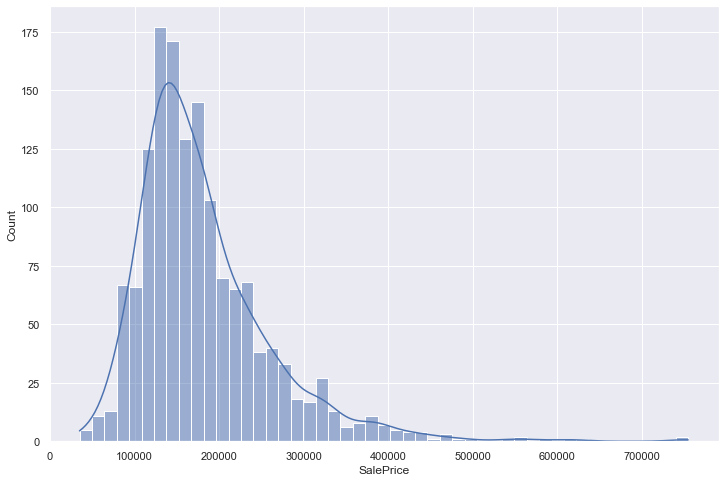

In [4]:
# distribution of sale prices
plt.figure(figsize=(12,8))
sns.histplot(train.SalePrice, kde=True);

The average home sale price is \\$180,921.19 and the histogram also shows that most houses are sold for a value between \$100K and \\$250K.

## 2. View correlation between features.
This can show potential relationships that affect the SalePrice.

#### 2.a. Correlation Matrix

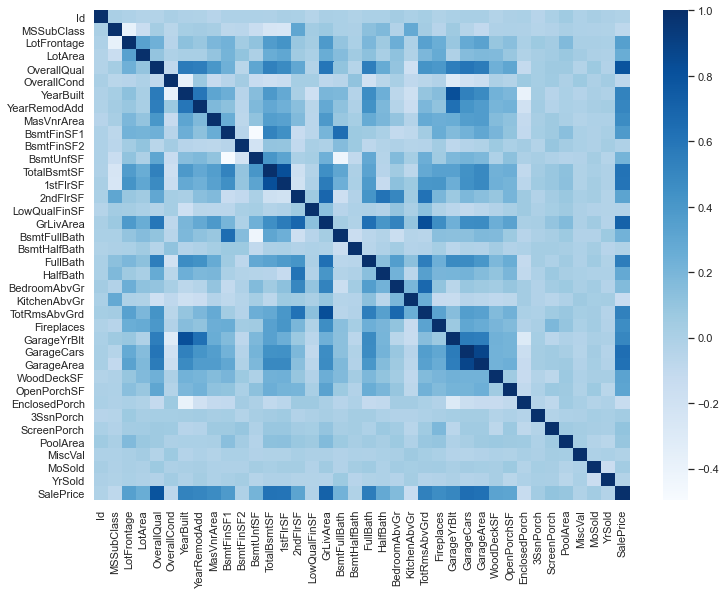

In [5]:
# plot correlation matrix
plt.figure(figsize=(12,9))
sns.heatmap(train.corr(), cmap="Blues");

By looking at the last row of colors (SalePrice), we can see the features have a high correlation, which is indicated by a darker blue. The features 'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageCars', 'GarageArea', 'YearBuilt' and 'FullBath' seem to have the highest correlation with 'SalePrice'.

#### 2.b. SalePrice and highly correlated features

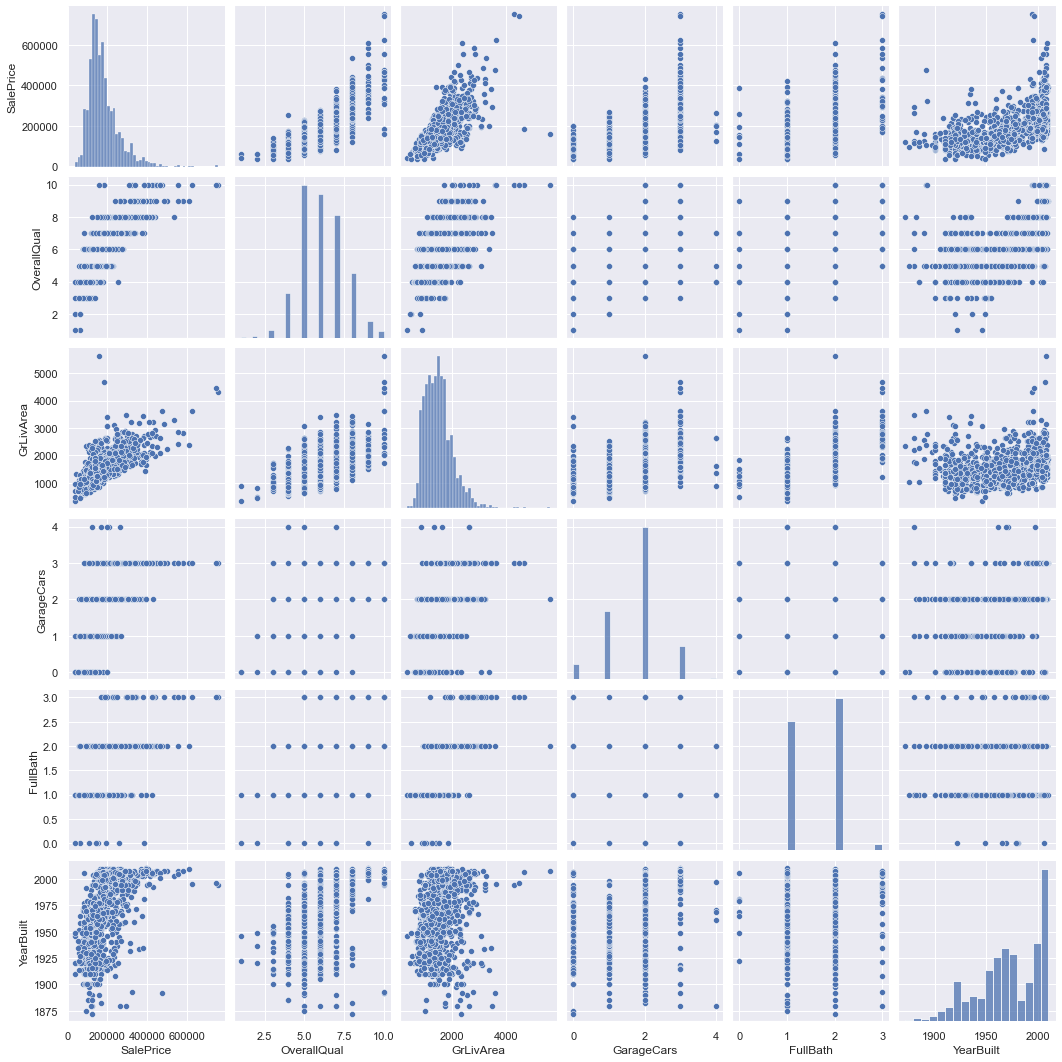

In [6]:
# pairplot with some of highly correlated features and SalePrice
highcorr = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'FullBath', 'YearBuilt']
sns.pairplot(train[highcorr]);

#### 2.c. Specific features with SalePrice

The correlation between OverallQual and SalePrice is 0.791


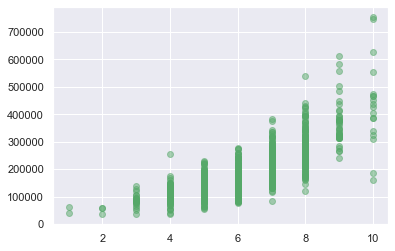

In [7]:
# OverallQual looks to have the highest correlation with price
print("The correlation between OverallQual and SalePrice is", 
      round(train.OverallQual.corr(train.SalePrice), 3))
plt.scatter(train.OverallQual, train.SalePrice, alpha=0.5, c='g');

Below, GarageArea and GarageCars should show similar types of information since they are both explaining the size of the garage.

The correlation between GarageCars and SalePrice is 0.64


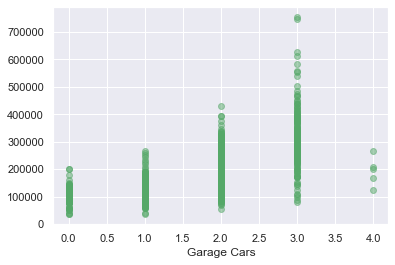

In [8]:
print("The correlation between GarageCars and SalePrice is", 
      round(train.GarageCars.corr(train.SalePrice), 3))
plt.xlabel("Garage Cars")
plt.scatter(train.GarageCars, train.SalePrice, alpha=0.5, c='g');

The correlation between GarageArea and SalePrice is 0.623


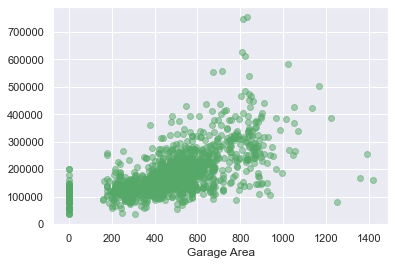

In [9]:
print("The correlation between GarageArea and SalePrice is", 
      round(train.GarageArea.corr(train.SalePrice), 3))
plt.xlabel("Garage Area")
plt.scatter(train.GarageArea, train.SalePrice, alpha=0.5, c='g');

In [10]:
print("The correlation between GarageArea and GarageCars is", 
      round(train.GarageArea.corr(train.GarageCars), 3))

The correlation between GarageArea and GarageCars is 0.882


As expected, GarageArea and GarageCars show a very similar pattern to each other, which also means they are collinear. Above, it shows that they have a high correlation to each other as well. 

Something else that is interesting about the garage size is that the price actually dips down for the largest area & number of cars. There seems to be a middle area that leads to the highest prices.

## 3. Compare SalePrice with categorical features.
There may be some categorical features that have a high correlation with price. If so, it is may be possible to change some of them to numerical values.

#### 3.a. SalePrice and Neighborhood
From general knowlege about home prices, it is likely that the location of the house can have an impact of the price.

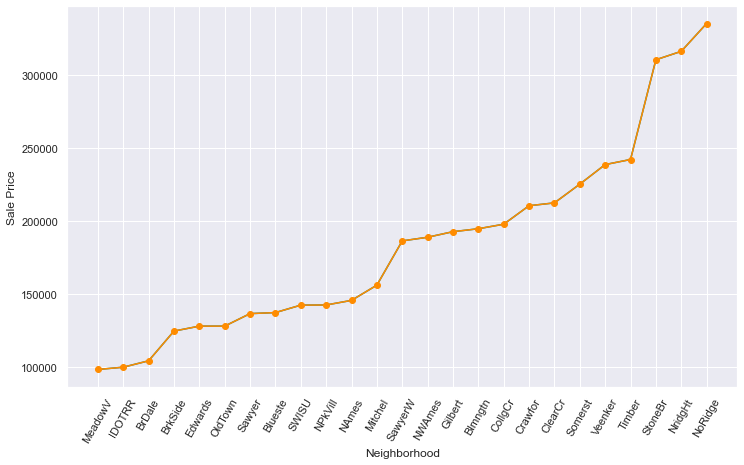

In [11]:
# plot average sale price per neighborhood
plt.figure(figsize=(12,7))
plt.xticks(rotation=60)
plt.ylabel("Sale Price")
plt.xlabel("Neighborhood")
SPrice_Neighborhood = train.groupby('Neighborhood')['SalePrice'].mean().sort_values()
plt.plot(SPrice_Neighborhood, c='teal');
plt.plot(SPrice_Neighborhood, marker='o', c='darkorange');

#### 3.b. SalePrice and GarageType
Since the numerical 'GarageCars' and 'GarageArea' features showed high correlation, this might be an additional important feature.

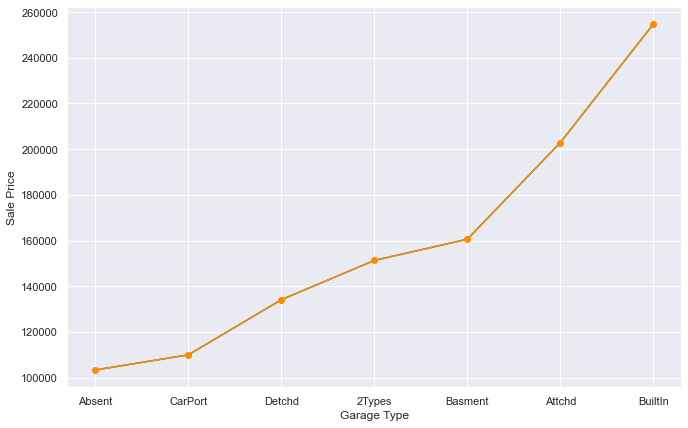

In [12]:
# plot avg sale price per garage type
plt.figure(figsize=(11,7))
plt.ylabel("Sale Price")
plt.xlabel("Garage Type")
SPrice_GarageType = train.groupby('GarageType')['SalePrice'].mean().sort_values()
plt.plot(SPrice_GarageType, c='teal');
plt.plot(SPrice_GarageType, marker='o', c='darkorange');

#### 3.c. SalePrice and HouseStyle

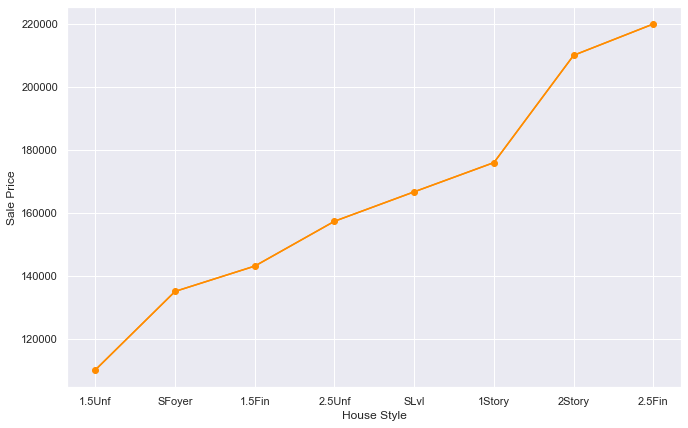

In [13]:
# plot average sale price for each house style
plt.figure(figsize=(11,7))
plt.ylabel("Sale Price")
plt.xlabel("House Style")
SPrice_HStyle = train.groupby('HouseStyle')['SalePrice'].mean().sort_values()
plt.plot(SPrice_HStyle, c='darkorange');
plt.plot(SPrice_HStyle, marker='o', c='darkorange');

The GarageType also seems to have some correlation with prices, however, it may be collinear to the other Garage features, so I will not use that. HouseStyle could also be similar to the GrLivArea since it's also indicating the size of the house.

There are clearly some neighborhoods that have high prices while some have considerably lower prices. There does not seem to be any other location feature, so this seems like an important feature to use. 

## 4. Transform 'Neighborhood '
I will transform the 'Neighborhood' categorical feature into a numerical feature. For each name, I will assign a specific number that can be used to identify the neighborhood. 

This section of code was performed twice: first with 'train' and then with 'test'.

In [3]:
print("There are", len(test.Neighborhood.unique()), "neighborhoods in the data set.")

There are 25 neighborhoods in the data set.


Store the neighborhood names and numerical ID based on average overall quality. Since we already know that OverallQual is highly correlated with prices. This will allow the lower ID to be associated with lower prices and a higher ID will be associated with higher prices. 

In [4]:
# sort neighborhood names by average OverallQual
# since 'SalePrice' is not given in the test data
OverallQual_Neighborhood = test.groupby('Neighborhood')['OverallQual'].mean().sort_values()
neighborhoods = OverallQual_Neighborhood.index
# create the corresponding numerical values 
new_vals = np.arange(1, len(neighborhoods)+1) # 1 - 25

In [5]:
# create a new column 
test['Neighborhood_Num'] = test['Neighborhood']

In [6]:
# update new column with numerical values
for old,new in zip(neighborhoods, new_vals):
    test.Neighborhood_Num.replace(old, new, inplace=True)

In [7]:
# to ensure it was done correctly
# check that the counts of each neighborhood are the same
check = list(test.Neighborhood.value_counts().sort_values())==list(
                test.Neighborhood_Num.value_counts().sort_values())
# print result of test
if check==True:
    print("The numerical feature for neighborhood was successfully created.")
else:
    "There was some error. New feature is not correct."

The numerical feature for neighborhood was successfully created.


In [8]:
# save this new data to a new file
test.to_csv("CleanTransformedTest.csv", index=False)

Plot the new numerical feature.

The correlation between Neighborhood and OverallQual is 0.706


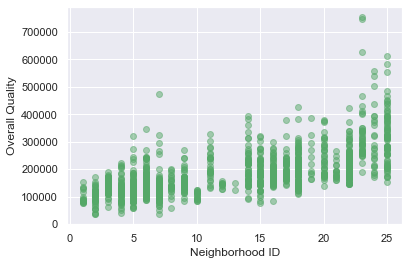

In [22]:
# Neighborhood looks to have a high correlation with OverallQual
print("The correlation between Neighborhood and OverallQual is", 
      round(train.Neighborhood_Num.corr(train.OverallQual), 3))
plt.xlabel("Neighborhood ID")
plt.ylabel("Overall Quality")
plt.scatter(train.Neighborhood_Num, train.SalePrice, alpha=0.5, c='g');

Two features having a high correlation with each other could indicate collinearity. However, we will see in the following notebook how this affects the model.